# Exploratory Data Analysis (EDA) on Sales Data
This notebook will perform descriptive statistics and visualizations to analyze sales data.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load Your Cleaned Dataset
df = pd.read_csv("cleaned_sales_data.csv")

# Display basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   int64  
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
display(df.head())

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,date,day_of_week,month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,Saturday,2019-01
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10,Cash,76.40,4.761905,3.8200,9.6,2019-03-08,Friday,2019-03
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03,Sunday,2019-03
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27,Sunday,2019-01
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08,Friday,2019-02


## Descriptive Statistics

In [8]:
# Select only numerical columns before applying correlation
numeric_df = df.select_dtypes(include=['number'])
print(numeric_df.corr())

                         Unit price  Quantity    Tax 5%     Total      Time  \
Unit price                 1.000000  0.010778  0.633962  0.633962  0.008242   
Quantity                   0.010778  1.000000  0.705510  0.705510 -0.007317   
Tax 5%                     0.633962  0.705510  1.000000  1.000000 -0.002770   
Total                      0.633962  0.705510  1.000000  1.000000 -0.002770   
Time                       0.008242 -0.007317 -0.002770 -0.002770  1.000000   
cogs                       0.633962  0.705510  1.000000  1.000000 -0.002770   
gross margin percentage         NaN       NaN       NaN       NaN       NaN   
gross income               0.633962  0.705510  1.000000  1.000000 -0.002770   
Rating                    -0.008778 -0.015815 -0.036442 -0.036442 -0.030588   

                             cogs  gross margin percentage  gross income  \
Unit price               0.633962                      NaN      0.633962   
Quantity                 0.705510                      Na

In [9]:
# Key statistics
print("Mean Unit Price:", df['Unit price'].mean())
print("Median Quantity:", df['Quantity'].median())
print("Mode of Payment Method:", df['Payment'].mode()[0])

Mean Unit Price: 55.67213
Median Quantity: 5.0
Mode of Payment Method: Ewallet


## Data Visualizations

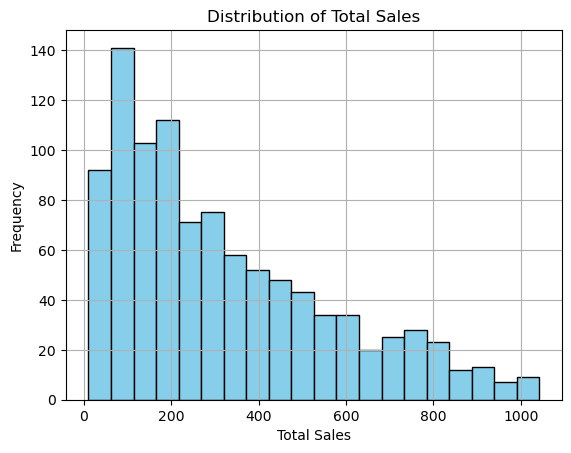

In [10]:
# Histogram of Total Sales
df['Total'].hist(bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.title("Distribution of Total Sales")
plt.show()

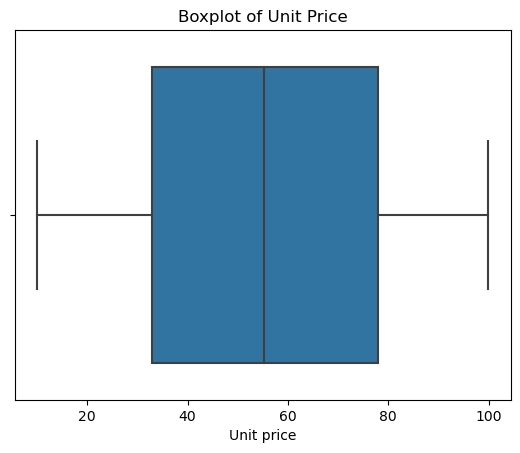

In [11]:
# Boxplot for Unit Price to check outliers
sns.boxplot(x=df['Unit price'])
plt.title("Boxplot of Unit Price")
plt.show()

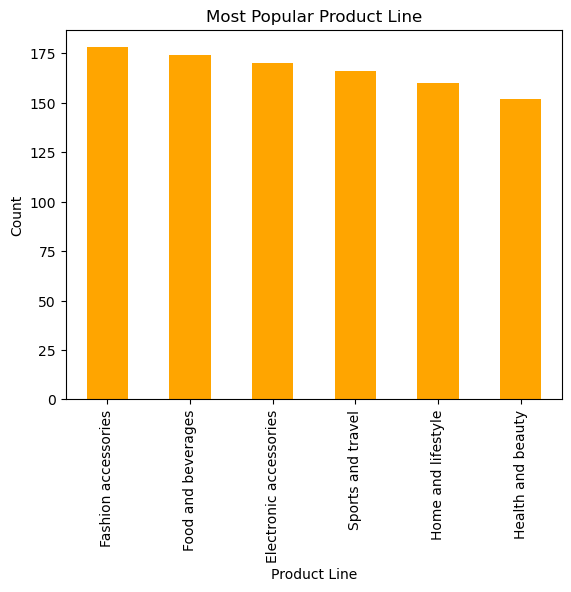

In [12]:
# Bar Chart for Most Popular Product Line
df['Product line'].value_counts().plot(kind='bar', color='orange')
plt.xlabel("Product Line")
plt.ylabel("Count")
plt.title("Most Popular Product Line")
plt.show()

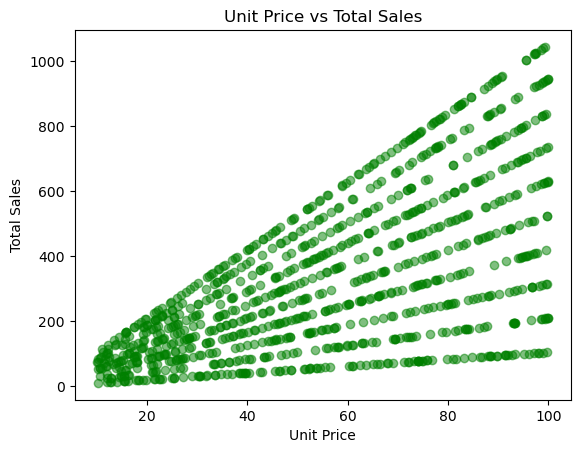

In [13]:
# Scatter Plot: Relationship between Unit Price and Total Sales
plt.scatter(df['Unit price'], df['Total'], alpha=0.5, color='green')
plt.xlabel("Unit Price")
plt.ylabel("Total Sales")
plt.title("Unit Price vs Total Sales")
plt.show()

## Save Processed Data

In [14]:
df.to_csv("eda_sales_data.csv", index=False)
print("EDA Completed! Summary of key insights:")
print("- Most popular product line: ", df['Product line'].value_counts().idxmax())
print("- Unit price has outliers as seen in the boxplot.")
print("- Strong correlation between Quantity and Total Sales.")

EDA Completed! Summary of key insights:
- Most popular product line:  Fashion accessories
- Unit price has outliers as seen in the boxplot.
- Strong correlation between Quantity and Total Sales.
